In [1]:
# Basic setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model & preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [12]:
# ----------------------------
# STEP 2: Load the CSV Files
# ----------------------------
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")  # No labels here


In [13]:
# ----------------------------
# STEP 3: Preprocess the Train Data
# ----------------------------

# Separate features and labels
X = train_df.drop("label", axis=1).values
y = train_df["label"].values

# Normalize pixel values
X = X / 255.0

# Reshape to (samples, 28, 28, 1)
X = X.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_cat = to_categorical(y, 10)

# Split train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.1, random_state=42)


In [14]:
# ----------------------------
# STEP 4: Preprocess the Test Data (Unlabeled)
# ----------------------------
X_test = test_df.values
X_test = X_test / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)


In [15]:
# ----------------------------
# STEP 5: Build the CNN Model
# ----------------------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# ----------------------------
# STEP 6: Train the Model
# ----------------------------
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])


Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 34s 107ms/step - accuracy: 0.7919 - loss: 0.6849 - val_accuracy: 0.9690 - val_loss: 0.1003
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 43s 114ms/step - accuracy: 0.9693 - loss: 0.1010 - val_accuracy: 0.9752 - val_loss: 0.0745
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 32s 107ms/step - accuracy: 0.9806 - loss: 0.0690 - val_accuracy: 0.9838 - val_loss: 0.0527
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9820 - loss: 0.0586 - val_accuracy: 0.9840 - val_loss: 0.0471
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.9857 - loss: 0.0467 - val_accuracy: 0.9860 - val_loss: 0.0472
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 34s 116ms/step - accuracy: 0.9871 - loss: 0.0387 - val_accuracy: 0.9855 - val_loss: 0.0404
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 39s 110ms/step - accuracy: 0.9905 - loss: 0.0294 - val_accuracy: 0.9883 - val_loss: 0.0375
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9922 - loss: 0

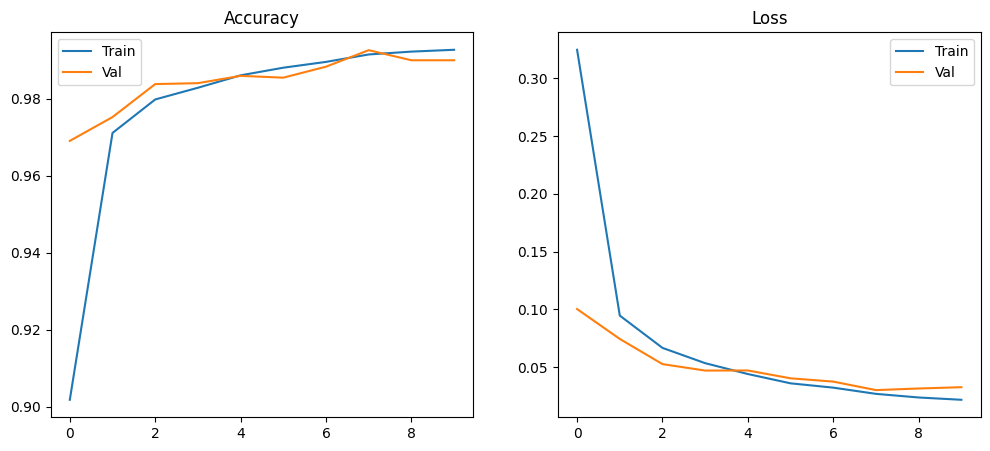

In [18]:
# ----------------------------
# STEP 7: Visualize Training Metrics
# ----------------------------
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss")
plt.legend()

plt.show()


875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step
[2 0 9 9 3 7 0 3 0 3]


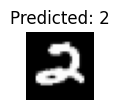

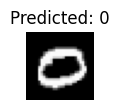

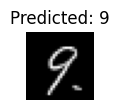

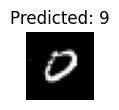

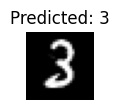

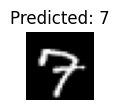

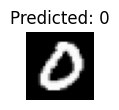

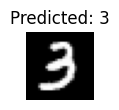

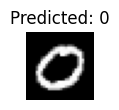

In [25]:
# ----------------------------
# STEP 8: Predict on Test Set (No Labels)
# ----------------------------
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# View a few predictions
print(predicted_labels[:10])
for i in range(9):
    plt.figure(figsize=(3, 3))
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()



In [22]:
# ----------------------------
# STEP 9: Export Predictions
# ----------------------------
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(predicted_labels) + 1),
    "Label": predicted_labels
})

submission.to_csv("submission.csv", index=False)
submission.head()


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


📊 1. Sample Images from the Dataset

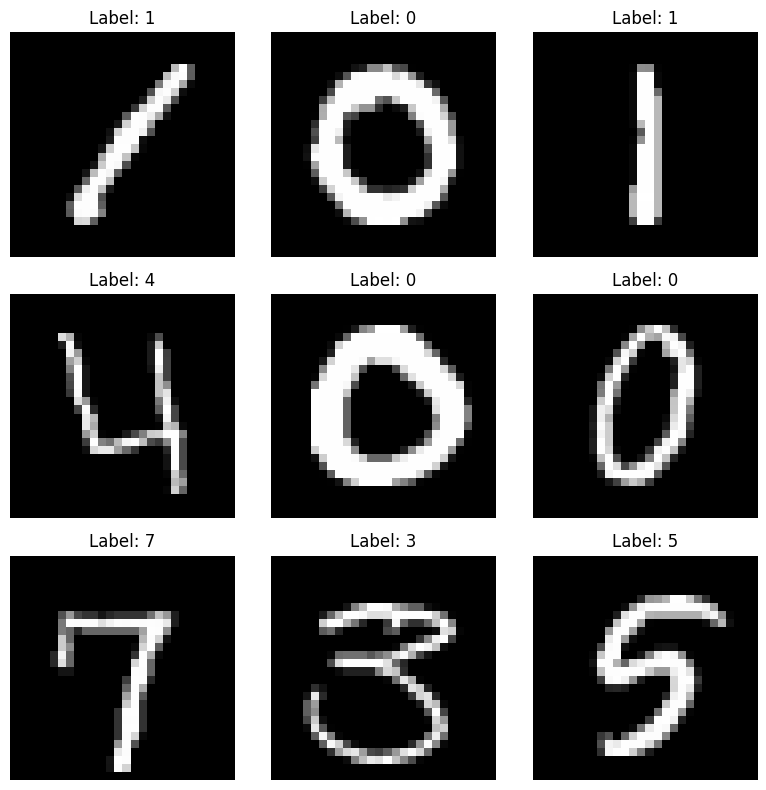

In [23]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_cat[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Label Distribution (Class Balance)

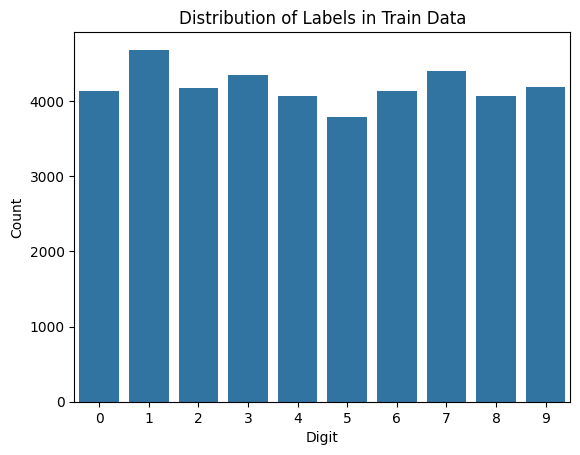

In [26]:
sns.countplot(x=train_df['label'])
plt.title("Distribution of Labels in Train Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()


132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step


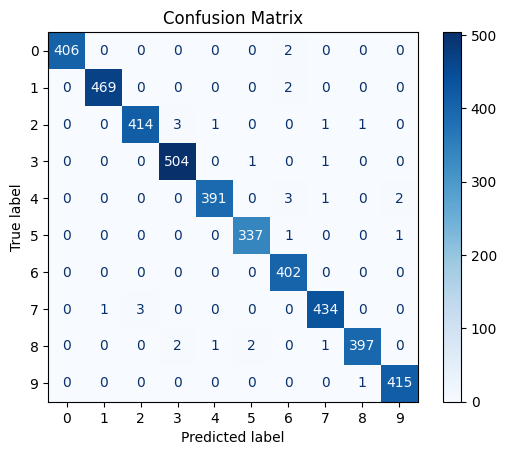

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predict on validation data (already labeled)
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_val_true = np.argmax(y_val, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val_true, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [28]:
print("Classification Report:\n")
print(classification_report(y_val_true, y_val_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       471
           2       0.99      0.99      0.99       420
           3       0.99      1.00      0.99       506
           4       0.99      0.98      0.99       397
           5       0.99      0.99      0.99       339
           6       0.98      1.00      0.99       402
           7       0.99      0.99      0.99       438
           8       0.99      0.99      0.99       403
           9       0.99      1.00      1.00       416

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



Visualizing Misclassified Images

Total Misclassifications: 31


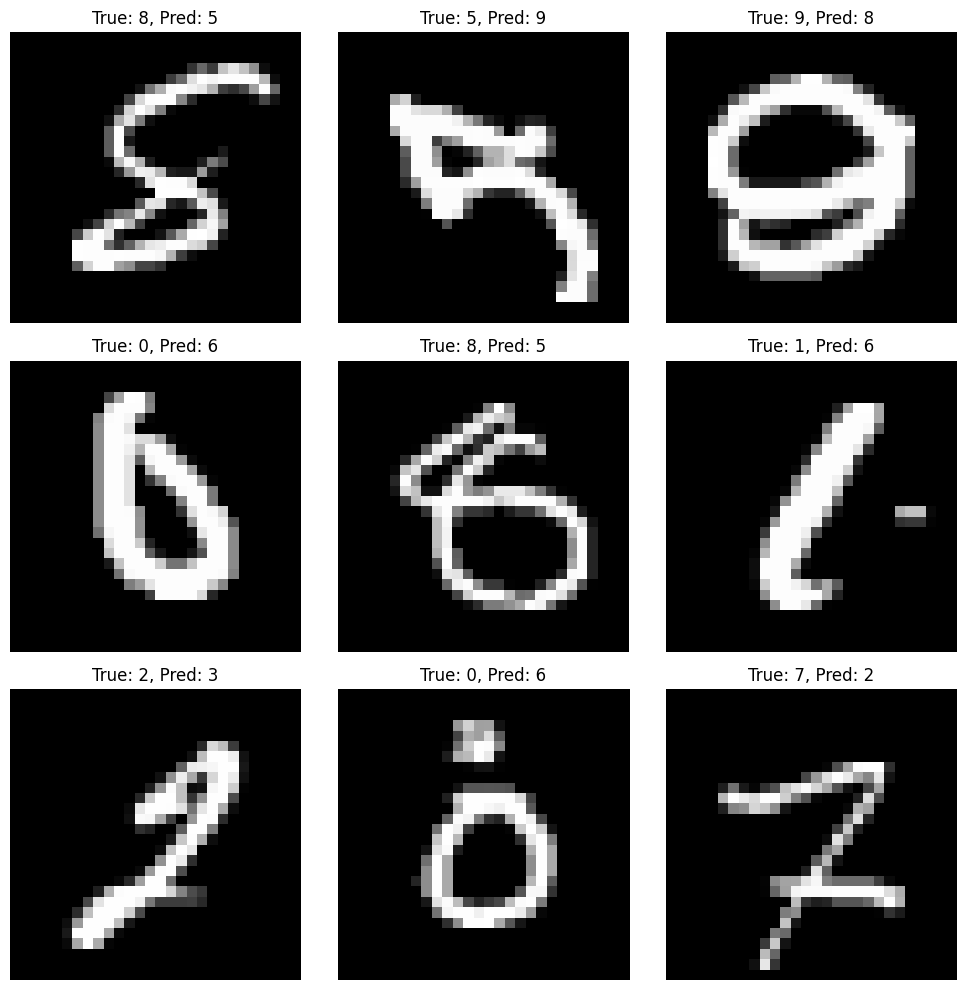

In [29]:
incorrect = np.where(y_val_pred != y_val_true)[0]
print(f"Total Misclassifications: {len(incorrect)}")

plt.figure(figsize=(10, 10))
for i, idx in enumerate(incorrect[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_val[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_val_true[idx]}, Pred: {y_val_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
